In [1]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json

names = ['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']

In [37]:
# shutil.copytree('b_ds', 'b_ds_copy')

'b_ds_copy'

In [36]:
# # shutil.rmtree('b_ds')
# shutil.rmtree('b_ds_copy')

In [55]:
# # reset b_ds

# shutil.rmtree('b_ds')
# shutil.copytree('b_ds_copy', 'b_ds')

# # read data.yaml from b_ds
# with open('b_ds/data.yaml', 'r') as f:
#     data = f.read()

# # remove everything after "roboflow"
# data = data.split('roboflow')[0] # this will be the same...

# # get all names from data.yaml
# names = data.split('names: ')[1]

# # convert string names to list
# names = eval(names)
# print(names)

# # rewrite train, val, test to go to final_ds/{split}/images instead of ../{split}/images
# data = data.replace('../train/images', 'final_ds/train/images')
# data = data.replace('../valid/images', 'final_ds/valid/images')
# data = data.replace('../test/images', 'final_ds/test/images')

# print(data)

'b_ds'

### Load functions

In [2]:
path = os.getcwd()

In [15]:
"""
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/MRB62321-6231-dolichospermum-1_lab.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/aphanizomenon-136561506-original.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/dolichospermum-217486111-original.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/dolichospermum-2483425-original.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/dolichospermum-4120-6_lab.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/dolichospermum-88396277-original.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/microcystis-101618929-original.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov5/final_ds/train/images/microcystis-77394464-original.jpg: 1 duplicate labels removed

"""

dupes = [
    'MRB62321-6231-dolichospermum-1_lab', 
    'aphanizomenon-136561506-original.jpg', 
    'dolichospermum-217486111-original.jpg', 
    'dolichospermum-2483425-original.jpg', 
    'dolichospermum-4120-6_lab.jpg', 
    'dolichospermum-88396277-original.jpg', 
    'microcystis-101618929-original.jpg', 
    'microcystis-77394464-original.jpg',
    'microcystis-SRO72021-72121-14_lab.jpg'
]

def no_dupes(lines):
    for i, line in enumerate(lines):
        for j, line2 in enumerate(lines):
            if line == line2.strip():
                return False
    return True
# remove duplicate labels
for split in ['train', 'valid', 'test']:
    for file in os.listdir(f'b_ds/{split}/images'):
        if file in dupes:
            print(file)
            with open(f'b_ds/{split}/labels/{file[:-4]}.txt', 'r+') as f:
                lines = f.readlines()

                # remove '\n' from lines
                
                # print(lines)
                # replace duplicate labels with new labels
                
                while(no_dupes(lines)):
                    for i, line in enumerate(lines):
                        # if you have seen that line before
                        for j, line2 in enumerate(lines):
                            if line == line2.strip():
                                # get rid of the line
                                try:
                                    lines.remove(line)
                                
                                except:
                                    lines.remove(line + "\n")
                
                # add back in \n

                print(lines)

                

                    
                
            # lines = list(set(lines))
            # with open(f'b_ds/{split}/labels/{file}', 'w') as f:
            #     # if 
            #     f.writelines(lines)

microcystis-77394464-original.jpg
['3 0.5 0.5107421875 1 0.978515625\n', '3 0.5 0.5107421875 1 0.978515625']
microcystis-101618929-original.jpg
['3 0.5 0.5126953125 1 0.974609375\n', '3 0.5 0.5126953125 1 0.974609375']
dolichospermum-2483425-original.jpg
['2 0.515625 0.5078125 0.2197265625 0.23828125\n', '2 0.515625 0.5078125 0.2197265625 0.23828125']
dolichospermum-217486111-original.jpg
['2 0.5859375 0.548828125 0.82421875 0.90234375\n', '2 0.5859375 0.548828125 0.82421875 0.90234375\n', '2 0.5859375 0.548828125 0.82421875 0.90234375']
microcystis-SRO72021-72121-14_lab.jpg
['3 0.5263671875 0.4736328125 0.6162109375 0.58984375\n', '3 0.525390625 0.4736328125 0.6162109375 0.58984375\n', '3 0.5263671875 0.4736328125 0.6162109375 0.58984375']
dolichospermum-88396277-original.jpg
['2 0.138671875 0.16015625 0.275390625 0.3203125\n', '2 0.138671875 0.16015625 0.275390625 0.3203125\n', '2 0.17578125 0.83984375 0.126953125 0.3193359375\n', '2 0.138671875 0.16015625 0.275390625 0.3203125\n', '

## UTILS

In [3]:
def check_freqs_dir(base = "final_ds"):
    splits = [os.listdir(f'{base}/train/images'), os.listdir(f'{base}/valid/images'), os.listdir(f'{base}/test/images')]
    print("printing frequency information")
    trainlen, vallen, testlen = len(os.listdir(f'{base}/train/images')), len(os.listdir(f'{base}/valid/images')), len(os.listdir(f'{base}/test/images'))
    print(trainlen, vallen, testlen)
    print("total dataset size: ", trainlen + vallen + testlen)

    print("train", trainlen, "valid", vallen, "test", testlen)

    splitarr = ['train', 'valid', 'test']
    # dictionary storing percentage frequencies across splits
    freqs = {}
    for name in names:
        freqs[name] = [0,0,0]
    
    freqs["background"] = [0,0,0]

    
    for i in range(len(splits)):
        for name in names:
            for file in splits[i]:
                if name.lower() in file.lower():
                    freqs[name][i] += 1
    print("background frequencies")
    # check background frequencies
    for i in range(len(splits)):
        for file in splits[i]:
            if "background" in file:
                freqs["background"][i] += 1
    
    print(freqs)
    
    for name in names:
        if sum(freqs[name]) == 0:
            continue
        for i in range(len(freqs[name])):
            print(name, splitarr[i], freqs[name][i]/sum(freqs[name]), freqs[name][i])
        
        # print total number of images
        print(f"total number of {name}: ", sum(freqs[name]))

    

    for i in range(len(freqs["background"])):
        if sum(freqs["background"]) == 0:
            continue
        print("background", splitarr[i], freqs["background"][i]/sum(freqs["background"]), freqs["background"][i])

    print("total background images", sum(freqs["background"]))
    # print proportion of background images
    print("proportion of background images: ", sum(freqs["background"])/(trainlen+vallen+testlen))

def check_freqs(ftrain, fval, ftest):
    splits = [ftrain, fval, ftest]
    print("printing frequency information")
    print(len(ftrain), len(fval), len(ftest))
    print(len(ftrain)/(len(ftrain)+len(fval)+len(ftest)))
    splitarr = ['train', 'val', 'test']
    # dictionary storing percentage frequencies across splits
    freqs = {}
    for name in names:
        freqs[name] = [0,0,0]
    
    freqs["background"] = [0,0,0]

    print("total dataset size: ", len(ftrain)+len(fval)+len(ftest))
    for i in range(len(splits)):
        for name in names:
            for file in splits[i]:
                if name in file:
                    freqs[name][i] += 1
    
    for name in names:
        for i in range(len(freqs[name])):
            print(name, splitarr[i], freqs[name][i]/sum(freqs[name]), freqs[name][i])
        
        # print total number of images
        print(f"total number of {name}: ", sum(freqs[name]))

    print("background frequencies")
    # check background frequencies
    for i in range(len(splits)):
        for file in splits[i]:
            if "background" in file:
                freqs["background"][i] += 1

    for i in range(len(freqs["background"])):
        print("background", splitarr[i], freqs["background"][i]/sum(freqs["background"]), freqs["background"][i])

    print("total background images", sum(freqs["background"]))
    # print proportion of background images
    print("proportion of background images: ", sum(freqs["background"])/(len(ftrain)+len(fval)+len(ftest)))

In [4]:
check_freqs_dir('color_ds_test')

printing frequency information
1420 178 182
total dataset size:  1780
train 1420 valid 178 test 182
background frequencies
{'aphanizomenon': [164, 21, 21], 'detritus': [29, 4, 4], 'dolichospermum': [303, 38, 38], 'microcystis': [418, 52, 53], 'oscillatoria': [73, 9, 10], 'water bubble': [78, 10, 10], 'woronichinia': [233, 29, 30], 'background': [122, 15, 16]}
aphanizomenon train 0.7961165048543689 164
aphanizomenon valid 0.10194174757281553 21
aphanizomenon test 0.10194174757281553 21
total number of aphanizomenon:  206
detritus train 0.7837837837837838 29
detritus valid 0.10810810810810811 4
detritus test 0.10810810810810811 4
total number of detritus:  37
dolichospermum train 0.7994722955145118 303
dolichospermum valid 0.10026385224274406 38
dolichospermum test 0.10026385224274406 38
total number of dolichospermum:  379
microcystis train 0.7992351816443595 418
microcystis valid 0.0994263862332696 52
microcystis test 0.10133843212237094 53
total number of microcystis:  523
oscillatori

In [5]:
check_freqs_dir('color_ds')

printing frequency information
1420 178 182
total dataset size:  1780
train 1420 valid 178 test 182
background frequencies
{'aphanizomenon': [164, 21, 21], 'detritus': [29, 4, 4], 'dolichospermum': [303, 38, 38], 'microcystis': [418, 52, 53], 'oscillatoria': [73, 9, 10], 'water bubble': [78, 10, 10], 'woronichinia': [233, 29, 30], 'background': [122, 15, 16]}
aphanizomenon train 0.7961165048543689 164
aphanizomenon valid 0.10194174757281553 21
aphanizomenon test 0.10194174757281553 21
total number of aphanizomenon:  206
detritus train 0.7837837837837838 29
detritus valid 0.10810810810810811 4
detritus test 0.10810810810810811 4
total number of detritus:  37
dolichospermum train 0.7994722955145118 303
dolichospermum valid 0.10026385224274406 38
dolichospermum test 0.10026385224274406 38
total number of dolichospermum:  379
microcystis train 0.7992351816443595 418
microcystis valid 0.0994263862332696 52
microcystis test 0.10133843212237094 53
total number of microcystis:  523
oscillatori

In [9]:
# iterate through grayscale_ds and remove images that have "background" in them
resized = 0
for split in ['train', 'valid', 'test']:
    for file in os.listdir(f'bacteriacoco/{split}'):
        # if it is an image
        if file[-4:] == ".jpg":
            # resize image to 416x416
            img = cv2.imread(f'bacteriacoco/{split}/{file}')
            img = cv2.resize(img, (416, 416))
            cv2.imwrite(f'bacteriacoco/{split}/{file}', img)
            resized+=1

In [10]:
print(resized)

1780


In [7]:
print(removed)

153


## MAIN BODY

In [22]:
dimensions = {}

In [23]:
def clean_roboflow_dataset():
    # get index of "_jpg" 
    names = ['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']
    for split in os.listdir('b_ds'):
        if split == 'test' or split == 'train' or split == 'valid':
            print(split)
            for image in os.listdir(f'b_ds/{split}/images'):
                # rename image at this path to remove "_jpg"
                # get index of "_jpg"
                name, ext = os.path.splitext(image)
                # b_ds/test/images/woronichinia-259918842-original_jpg.rf.6aa07c318a25214c7d100b271443c1d6.jpg
                new_image = image[:image.rfind('_')] + ext
                # replace current image with new image
                # get image path

                label = image[:-4] + '.txt'
                os.rename(f'b_ds/{split}/images/{image}', f'b_ds/{split}/images/{new_image}')
                os.rename(f'b_ds/{split}/labels/{label}', f'b_ds/{split}/labels/{new_image[:-4]}.txt')

                found = False
                for comp_name in names:
                    if comp_name.lower() in new_image.lower():
                        found = True
                        break
                
                if not found:
                    # this is for lab images that do not have the name associated to it
                    
                    # retrieve label from corresponding txt file
                    if os.path.exists(f'b_ds/{split}/labels/{new_image[:-4]}.txt'):   
                        with open(f'b_ds/{split}/labels/{new_image[:-4]}.txt', 'r') as f:
                            label = f.read()
                            if len(label) > 0:
                                label = int(label.split(' ')[0])
                                # copy image to corresponding folder
                                os.rename(f'b_ds/{split}/images/{new_image}', f'b_ds/{split}/images/{names[label]}-{new_image}')
                                # copy label to corresponding folder
                                os.rename(f'b_ds/{split}/labels/{new_image[:-4]}.txt', f'b_ds/{split}/labels/{names[label]}-{new_image[:-4]}.txt')


def check_for_incorrect_labels():
    for split in os.listdir('b_ds'):
        if split == 'train' or split == 'valid' or split == 'test':
            for image in os.listdir(f'b_ds/{split}/images'):
                matches = False
                for name in names:
                    if name.lower() in image.lower():
                        if not os.path.exists(f'b_ds/{split}/labels/{image[:-4]}.txt'):
                            continue
                        with open(f'b_ds/{split}/labels/{image[:-4]}.txt', 'r') as f:
                            data = f.read()
                            if len(data) == 0:
                                continue
                            data = int(data.split(' ')[0])

                            if names[data] == name:
                                matches = True
                                break
                
                if not matches:
                    print(split, image)

def move_to_combined(exclude_classes = ['anabaena']):
    splits = ['test', 'train', 'valid']

    if os.path.exists(path + f"/combined_ds"):
        shutil.rmtree(path + f"/combined_ds")
    os.mkdir(path + f"/combined_ds")
    os.mkdir(path + f"/combined_ds/images")
    os.mkdir(path + f"/combined_ds/labels")

    # 
    seen = []
    for split in splits:
        for img in os.listdir(f'{path}/b_ds/{split}/images'):
            if len(exclude_classes) > 0:
                for exclude_class in exclude_classes:
                    if not exclude_class in img:
                        shutil.copy(f'{path}/b_ds/{split}/images/{img}', f'{path}/combined_ds/images/{img}')
            else:
                shutil.copy(f'{path}/b_ds/{split}/images/{img}', f'{path}/combined_ds/images/{img}')
        for label in os.listdir(f'{path}/b_ds/{split}/labels'):
            if len(exclude_classes) > 0:
                for exclude_class in exclude_classes:            
                    if not exclude_class in label:
                        shutil.copy(f'{path}/b_ds/{split}/labels/{label}', f'{path}/combined_ds/labels/{label}')
            else:
                shutil.copy(f'{path}/b_ds/{split}/labels/{label}', f'{path}/combined_ds/labels/{label}')

def generate_CLAHE(image_path, output_path, grayscale = False):
    if not grayscale:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (512, 512))
        lab = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2LAB)
        lab_planes = list(cv2.split(lab))
        
        clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(32,32))
        lab_planes[0] = clahe.apply(lab_planes[0])
        lab = cv2.merge(tuple(lab_planes))
        bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        image = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    
        clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(32,32))
        image = clahe.apply(image)
    
    # get dimensions of image
    
    cv2.imwrite(output_path, image)
    
def preprocess(useCLAHE = False, grayscale = False, base = 'final_ds'):
    # images are already resized to 512x512
    # apply CLAHE to images
    for split in os.listdir(base):
        if split == 'train' or split == 'test' or split == 'valid':
            for img_path in os.listdir(f'{base}/{split}/images'):
                
                image = cv2.imread(f'{base}/{split}/images/{img_path}')
                height, width, channels = image.shape
                dimensions[f'{height}x{width}'] = dimensions.get(f'{height}x{width}', 0) + 1
                
                image = cv2.resize(image, (512, 512))

                cv2.imwrite(f'{base}/{split}/images/{img_path}', image)
                
                if useCLAHE:
                    generate_CLAHE(f'{base}/{split}/images/{img_path}', f'{base}/{split}/images/{img_path}', grayscale)

                else:
                    cv2.imwrite(f'{base}/{split}/images/{img_path}', image)

check_for_incorrect_labels()
def organize_to_names(backgrounds=0.1, augment=0):
    with open('licenses.json') as f:
        licenses = json.load(f)
        cannot_use = set([])
        for l, vals in licenses.items():
            if l == 'null':
                for name, imgs in licenses[l].items():
                    for img_name, url in imgs.items():
                        cannot_use.add(img_name)

    names_with_freqs = [0 for i in range(len(names))]
    x=0
    if os.path.exists(path + f"/org_ds"):
        shutil.rmtree(path + f"/org_ds")
    os.mkdir(path + f"/org_ds")
    for name in names:
        if os.path.exists(path + f"/org_ds/{name}"):
            shutil.rmtree(path + f"/org_ds/{name}")
        os.makedirs(path + f"/org_ds/{name}")
    
    if os.path.exists(path + f"/org_ds/labels"):
            shutil.rmtree(path + f"/org_ds/labels")
    os.makedirs(path + f"/org_ds/labels")

    if backgrounds > 0:
        if os.path.exists(path + f"/org_ds/backgrounds"):
            shutil.rmtree(path + f"/org_ds/backgrounds")
        os.makedirs(path + f"/org_ds/backgrounds")
    
    for label in os.listdir(path + "/combined_ds/labels"):
        # organize everything into folders based on
        if not os.path.exists(path + f"/combined_ds/labels/{label}"):
            print(label, "does not exist")
            continue
        with open(path + f"/combined_ds/labels/{label}") as file:
            # read first line
            asdf = file.readline()
            if len(asdf) == 0:
                print(label, "is empty")
                continue
            
            asdf = asdf.split(" ")[0]
            # print(asdf)
            numval = int(asdf)
            real_name = names[numval]
            
            # move image and label to folder
            names_with_freqs[numval] += 1
            
            name, extension = os.path.splitext(label)
            # assume that the file is already in jpg form
            if not name in cannot_use:
                shutil.copy(path + f"/combined_ds/images/{label[:-4]}.jpg", path + f"/org_ds/{real_name}/{name}.jpg")
                shutil.copy(path + f"/combined_ds/labels/{label}", path + f"/org_ds/labels/{name}.txt")

                # if augment > 0:
                #     augment_image(curr_name)
                    
                x+=1
            else:
                print(f"{name} is copyrighted, cannot be used")
    
    if backgrounds > 0:
        wanted_backgrounds = int(backgrounds * x)/(1-backgrounds)
        print(f"Total number of images: {x}")
        print(f"Total number of backgrounds: {wanted_backgrounds}")
        
        # get names of all files in Bacteria Dataset
        
        lab_images = []
        for folder in os.listdir(path + "/Bacteria Dataset/Dataset-1"):
            if os.path.isfile(folder) or (folder in names) or folder == "FlowCam Library 2021" or folder == "FlowCam Library Instructions.docx":
                continue
            for file in os.listdir(path + "/Bacteria Dataset/Dataset-1/" + folder):
                if file == ".DS_Store":
                    continue
                
                lab_images.append(file)
                name, extension = os.path.splitext(file)
                # assume that the file is already in jpg form
                image = cv2.imread(path + "/Bacteria Dataset/Dataset-1/" + folder + "/" + file)
                # image = cv2.resize(image, (512, 512))
                # lab = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2LAB)
                # lab_planes = list(cv2.split(lab))
                
                # clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(32,32))
                # lab_planes[0] = clahe.apply(lab_planes[0])
                # lab = cv2.merge(tuple(lab_planes))
                # bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
                # image = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

                cv2.imwrite(f'{path}/org_ds/backgrounds/{name}_background.jpg', image)


        for folder in os.listdir(path + "/Bacteria Dataset/Dataset-2"):
            if os.path.isfile(folder) or (folder in names) or folder == "FlowCam Library 2021" or folder == "FlowCam Library Instructions.docx":
                continue
                
            for file in os.listdir(path + "/Bacteria Dataset/Dataset-2/" + folder):
                if file == ".DS_Store":
                    continue

                lab_images.append(file)
                name, extension = os.path.splitext(file)

                image = cv2.imread(path + "/Bacteria Dataset/Dataset-2/" + folder + "/" + file)
                
                # image = cv2.resize(image, (512, 512))
                # lab = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2LAB)
                # lab_planes = list(cv2.split(lab))
                
                # clahe = cv2.createCLAHE(clipLimit=4, tileGridSize=(32,32))
                # lab_planes[0] = clahe.apply(lab_planes[0])
                # lab = cv2.merge(tuple(lab_planes))
                # bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
                # image = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

                cv2.imwrite(f'{path}/org_ds/backgrounds/{name}_background.jpg', image)

        np.random.seed(0)
        np.random.shuffle(lab_images)

        lab_images = lab_images[:int(wanted_backgrounds)]
        print(len(lab_images))

def reorganize_to_final(ftrain, fval, ftest, base, data):
    splits = ['train', 'valid', 'test']
    
    # clear existing final ds
    if os.path.exists(path + f"/{base}"):
        shutil.rmtree(path + f"/{base}")
    os.mkdir(path + f"/{base}")
    
    for split in splits:
        os.mkdir(path + f"/{base}/{split}")
        os.mkdir(path + f"/{base}/{split}/images")
        os.mkdir(path + f"/{base}/{split}/labels")
        
        if split == 'train':
            thing = ftrain
        elif split == 'valid':
            thing = fval
        elif split == 'test':
            thing = ftest
        
        for file in thing:
            classname = None
            for name in names:
                if name.lower() in file.lower():
                    classname = name
                    print(classname)
                    break
            
            if os.path.exists(path + f"/org_ds/labels/{file[:-4]}.txt"):
                shutil.copy(path + f"/org_ds/labels/{file[:-4]}.txt", path + f"/{base}/{split}/labels/{file[:-4]}.txt")
                shutil.copy(path + f"/org_ds/{classname}/{file}", path + f"/{base}/{split}/images/{file}")
            elif os.path.exists(path + f"/org_ds/backgrounds/{file}"):
                shutil.copy(path + f"/org_ds/backgrounds/{file}", path + f"/{base}/{split}/images/{file}")
            


    # add data.yaml file
    data = data.replace('final_ds', base)
    with open(path + f"/{base}/data.yaml", "w") as file:
        file.write(data)

def get_train_val_test_splits(include_backgrounds=False):
    path = os.getcwd()

    ftrain, fval, ftest = np.array([]), np.array([]), np.array([])
    # stratify splitting of data
    print("getting splits")
    for name in names:
        allFileNames = os.listdir(path + f"/org_ds/{name}")
        np.random.seed(0)
        np.random.shuffle(allFileNames)

        train, val, test = np.split(np.array(allFileNames),[int(len(allFileNames)*0.8), int(len(allFileNames)*0.9)])

        ftrain = np.concatenate((ftrain, train))
        fval = np.concatenate((fval, val))
        ftest = np.concatenate((ftest, test))

        print(name, len(train), len(val), len(test))
    
    

    if include_backgrounds:
        allFileNames = os.listdir(path + f"/org_ds/backgrounds")
        np.random.seed(0)
        np.random.shuffle(allFileNames)

        train, val, test = np.split(np.array(allFileNames),[int(len(allFileNames)*0.8), int(len(allFileNames)*0.9)])

        ftrain = np.concatenate((ftrain, train))
        fval = np.concatenate((fval, val))
        ftest = np.concatenate((ftest, test))

    print("final lengths after stratified split: ", len(ftrain), len(fval), len(ftest))
    
    global globftrain
    global globfval
    global globftest
    globftrain = ftrain
    globfval = fval
    globftest = ftest
    
    return ftrain, fval, ftest

In [4]:
def reset_all(new_base='final_ds'):
    # doing stuff
    shutil.rmtree('b_ds')
    shutil.copytree('b_ds_copy', 'b_ds')

    # read data.yaml from b_ds
    with open('b_ds/data.yaml', 'r') as f:
        data = f.read()

    # remove everything after "roboflow"
    data = data.split('roboflow')[0] # this will be the same...

    # get all names from data.yaml
    names = data.split('names: ')[1]

    # convert string names to list
    names = eval(names)
    print(names)

    # rewrite train, val, test to go to final_ds/{split}/images instead of ../{split}/images
    data = data.replace('../train/images', f'{new_base}/train/images')
    data = data.replace('../valid/images', f'{new_base}/valid/images')
    data = data.replace('../test/images', f'{new_base}/test/images')

    print('data: ', data)

    # remove all background images from b_ds
    for split in os.listdir('b_ds'):
        if split == 'train' or split == 'valid' or split == 'test':
            for filename in os.listdir(f'b_ds/{split}/images'):
                name, ext = os.path.splitext(filename)
                if 'background' in filename:
                    os.remove(f'b_ds/{split}/images/{filename}')
                    os.remove(f'b_ds/{split}/labels/{filename[:-4]}.txt')

    print(len(os.listdir('b_ds/train/images')) + len(os.listdir('b_ds/valid/images')) + len(os.listdir('b_ds/test/images')))

    return data

reset_all('color_ds')

['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']
data:  train: color_ds/train/images
val: color_ds/valid/images
test: color_ds/test/images

nc: 7
names: ['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']


1627


"train: color_ds/train/images\nval: color_ds/valid/images\ntest: color_ds/test/images\n\nnc: 7\nnames: ['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']\n\n"

In [5]:
def rebalance_dataset(**kwargs):
    print("deleting folders")
    send_to = kwargs.get('send_to', "final_ds")
    useCLAHE = kwargs.get('useCLAHE', False)
    augmentImages = kwargs.get('augment', 0)
    backgrounds = kwargs.get('backgrounds', 0.1)
    grayscale = kwargs.get('grayscale', False)
    data = kwargs.get('data', None)



    def delete_all_folders():
        shutil.rmtree(path + "/combined_ds")
        shutil.rmtree(path + "/org_ds")
        shutil.rmtree(path + f"/{send_to}")
    try:
        delete_all_folders()
    except:
        pass

    os.mkdir(path + f"/{send_to}")

    print("moving everything to combined")
    move_to_combined()
    
    print("organizing to names")

    organize_to_names(backgrounds, augment=augmentImages)
    
    ftrain, fval, ftest = get_train_val_test_splits(include_backgrounds = (backgrounds > 0))
    # check_freqs(ftrain, fval, ftest)
    print(fval)
    print(ftest)
    
    reorganize_to_final(ftrain, fval, ftest, base = send_to, data=data)

    print("preprocessing")
    preprocess(useCLAHE = useCLAHE, grayscale = grayscale, base = send_to)

    # send to zip
    shutil.make_archive(path + f"/{send_to}", 'zip', path + f"/{send_to}")

In [ ]:
# shutil.rmtree('b_ds')
# shutil.copytree('b_ds_copy', 'b_ds')

## RUN THIS BLOCK TO GENERATE DATASET

In [6]:
check_freqs_dir('color_ds')

NameError: name 'check_freqs_dir' is not defined

In [24]:
# clean up roboflow imported dataset

data = reset_all()
clean_roboflow_dataset()
check_for_incorrect_labels()

print("data", data)

# rebalance dataset
rebalance_dataset(send_to = "color_ds", useCLAHE = True, backgrounds = 0.1, grayscale = False, data = data)
# rebalance_dataset(send_to = "grayscale_ds", useCLAHE = True, backgrounds = 0.1, grayscale = True, data = data)
# rebalance_dataset(send_to = "no_bgs", useCLAHE = True, backgrounds = 0, grayscale = False, data = data)
# rebalance_dataset(send_to = "no_CLAHE", useCLAHE = False, backgrounds = 0.1, grayscale = False, data = data)

['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']
data:  train: final_ds/train/images
val: final_ds/valid/images
test: final_ds/test/images

nc: 7
names: ['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']


1627
valid
test
train
data train: final_ds/train/images
val: final_ds/valid/images
test: final_ds/test/images

nc: 7
names: ['aphanizomenon', 'detritus', 'dolichospermum', 'microcystis', 'oscillatoria', 'water bubble', 'woronichinia']


deleting folders
moving everything to combined
organizing to names
Total number of images: 1627
Total number of backgrounds: 180.0
153
getting splits
aphanizomenon 164 21 21
detritus 29 4 4
dolichospermum 303 38 38
microcystis 418 52 53
oscillatoria 73 9 10
water bubble 78 10 10
woronichinia 233 29 30
final lengths after stratified split:  1420 178 182
['aphanizomenon-66834733-original.jpg'
 'aphanizomenon-136568723-original.jpg'
 

In [25]:
print(dimensions)

{'512x512': 1627, '4160x2336': 6, '1856x1704': 1, '922x1228': 4, '3684x4912': 104, '2192x2032': 1, '1842x2456': 3, '2352x2272': 1, '2048x1824': 1, '3238x4301': 1, '2176x2144': 1, '2380x2440': 1, '1419x1351': 1, '1291x1625': 1, '1960x1848': 1, '2384x2456': 1, '1760x1776': 1, '2144x1936': 1, '2416x2096': 1, '3646x4203': 1, '1640x1620': 1, '1852x2469': 1, '1265x1687': 1, '1392x1575': 1, '707x781': 1, '1815x1815': 1, '497x663': 1, '1549x1765': 1, '2144x2616': 1, '1649x2336': 1, '1205x1554': 1, '2272x2576': 1, '129x134': 1, '2760x3192': 1, '2410x3140': 1, '2110x2060': 1, '3024x3456': 1, '3296x2608': 1, '2912x2618': 1, '2400x3224': 1, '2450x3210': 1}


In [ ]:
# print(len(os.listdir(path + "/final_ds/train/labels")))
# print(len(os.listdir(path + "/final_ds/valid/labels")))
# print(len(os.listdir(path + "/final_ds/test/labels")))

# check if all labels have corresponding images
for label in os.listdir(path + "/final_ds/train/labels"):
    with open(path + f"/final_ds/train/labels/{label}") as file:
        if len(file.readlines()) == 0:
            print(label)
    if not os.path.exists(path + f"/final_ds/train/images/{label[:-4]}.jpg"):
        print(label)

for label in os.listdir(path + "/final_ds/valid/labels"):
    with open(path + f"/final_ds/valid/labels/{label}") as file:
        if len(file.readlines()) == 0:
            print(label)
    if not os.path.exists(path + f"/final_ds/valid/images/{label[:-4]}.jpg"):
        print(label)

for label in os.listdir(path + "/final_ds/test/labels"):
    with open(path + f"/final_ds/test/labels/{label}") as file:
        if len(file.readlines()) == 0:
            print(label)
    if not os.path.exists(path + f"/final_ds/test/images/{label[:-4]}.jpg"):
        print(label)

In [95]:
check_freqs_dir('no_bgs')

printing frequency information
1298 163 166
total dataset size:  1627
train 1298 valid 163 test 166
background frequencies
{'aphanizomenon': [164, 21, 21], 'detritus': [29, 4, 4], 'dolichospermum': [303, 38, 38], 'microcystis': [418, 52, 53], 'oscillatoria': [73, 9, 10], 'water bubble': [78, 10, 10], 'woronichinia': [233, 29, 30], 'background': [0, 0, 0]}
aphanizomenon train 0.7961165048543689 164
aphanizomenon valid 0.10194174757281553 21
aphanizomenon test 0.10194174757281553 21
total number of aphanizomenon:  206
detritus train 0.7837837837837838 29
detritus valid 0.10810810810810811 4
detritus test 0.10810810810810811 4
total number of detritus:  37
dolichospermum train 0.7994722955145118 303
dolichospermum valid 0.10026385224274406 38
dolichospermum test 0.10026385224274406 38
total number of dolichospermum:  379
microcystis train 0.7992351816443595 418
microcystis valid 0.0994263862332696 52
microcystis test 0.10133843212237094 53
total number of microcystis:  523
oscillatoria tr

In [ ]:
print(len(os.listdir(path + "/final_ds/train/images")) + len(os.listdir(path + "/final_ds/valid/images")) + len(os.listdir(path + "/final_ds/test/images")))
# print(len(os.listdir(path + "/final_ds/valid/images")))
# print(len(os.listdir(path + "/final_ds/test/images")))

1805


In [ ]:
# find number of images from Bacteria Dataset folder that are in train, val, test of final_ds
dict_trainvaltest = {"train": 0, "val": 0, "test": 0}

for file in globftrain:
    if "default" in file:
        dict_trainvaltest["train"] += 1

for file in globfval:
    if "default" in file:
        dict_trainvaltest["val"] += 1   

for file in globftest:
    if "default" in file:
        dict_trainvaltest["test"] += 1

In [ ]:
print(dict_trainvaltest)

{'train': 0, 'val': 0, 'test': 0}


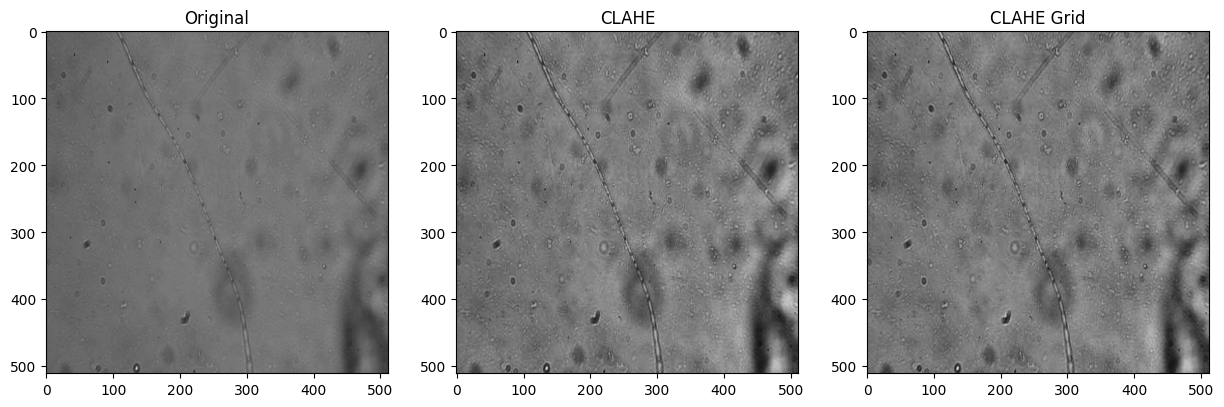

In [ ]:
# compare CLAHE vs no CLAHE
image = cv2.imread(f'b_ds/train/images/113466794-medium_jpeg.rf.2d09325e3a8b7a92660be0f29ed856f7.jpg', cv2.IMREAD_GRAYSCALE) # need to convert to grayscale
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_image = clahe.apply(image)

clahe_grid = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
clahe_grid_image = clahe_grid.apply(image)

# display original and CLAHE-ed images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(clahe_image, cmap='gray')
ax[1].set_title('CLAHE')
ax[2].imshow(clahe_grid_image, cmap='gray')
ax[2].set_title('CLAHE Grid')
plt.show()


# save CLAHE-ed image

In [ ]:
print(len(os.listdir(path + "/final_ds/train/images")))
print(len(os.listdir(path + "/final_ds/valid/images")))
print(len(os.listdir(path + "/final_ds/test/images")))

1441
180
184
